In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_data = pd.read_csv(r'C:\Users\ankus\OneDrive\Desktop\PYTHON\Python_DS_INTERNSHIP\DATASETS\Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
customer_data.shape 

(200, 5)

In [5]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
x = customer_data.iloc[:, [3,4]].values  

In [7]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):  
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


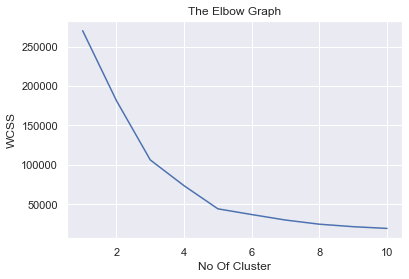

In [9]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Graph')
plt.xlabel('No Of Cluster')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 5, init='k-means++')
y = kmeans.fit_predict(x) 
print(y)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 4 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 2 1 4 1 2 1 2 1 4 1 2 1 2 1 2 1 2 1 4 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


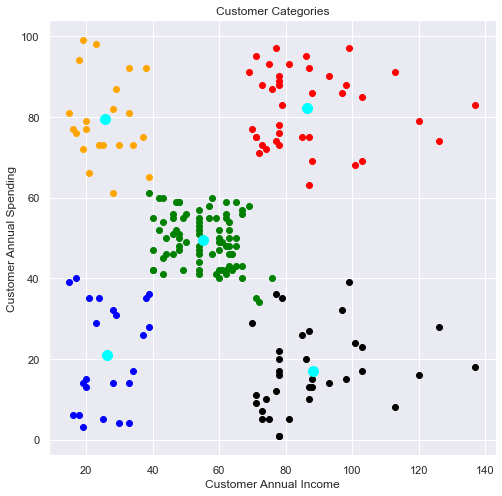

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], c='blue', label = 'customer_category-A')
plt.scatter(x[y==1,0], x[y==1,1], c='red', label = 'customer_category-B')
plt.scatter(x[y==2,0], x[y==2,1], c='black', label = 'customer_category-C')
plt.scatter(x[y==3,0], x[y==3,1], c='orange', label = 'customer_category-D')
plt.scatter(x[y==4,0], x[y==4,1], c='green', label = 'customer_category-E')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'cyan', label = 'Centroid')
plt.xlabel('Customer Annual Income')
plt.ylabel('Customer Annual Spending')
plt.show()

# DATASET - 2

In [12]:
weather_data = pd.read_csv(r'C:\Users\ankus\OneDrive\Desktop\PYTHON\Python_DS_INTERNSHIP\DATASETS\minute_weather.csv')
weather_data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [13]:
weather_data.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587257e+06,1.587257e+06,1.587257e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.587256e+06,1.587256e+06,1.587257e+06
mean,7.936280e+05,9.168301e+02,6.185144e+01,1.619654e+02,2.774272e+00,1.634030e+02,3.399813e+00,1.668264e+02,2.133130e+00,1.854836e-03,5.361460e-01,4.760837e+01
std,4.582018e+05,3.051593e+00,1.183362e+01,9.520812e+01,2.060758e+00,9.236723e+01,2.423167e+00,9.746275e+01,1.745345e+00,9.609716e-01,8.114766e+01,2.621454e+01
min,0.000000e+00,9.050000e+02,3.164000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01
25%,3.968140e+05,9.148000e+02,5.270000e+01,6.200000e+01,1.300000e+00,6.800000e+01,1.600000e+00,7.700000e+01,8.000000e-01,0.000000e+00,0.000000e+00,2.470000e+01
50%,7.936280e+05,9.167000e+02,6.224000e+01,1.820000e+02,2.200000e+00,1.870000e+02,2.700000e+00,1.800000e+02,1.600000e+00,0.000000e+00,0.000000e+00,4.470000e+01
75%,1.190442e+06,9.187000e+02,7.088000e+01,2.170000e+02,3.800000e+00,2.230000e+02,4.600000e+00,2.120000e+02,3.000000e+00,0.000000e+00,0.000000e+00,6.800000e+01
max,1.587256e+06,9.295000e+02,9.950000e+01,3.590000e+02,3.230000e+01,3.590000e+02,3.600000e+01,3.590000e+02,3.200000e+01,6.550100e+02,6.330500e+04,9.300000e+01


In [14]:
weather_data.shape

(1587257, 13)

In [15]:
weather_data.isnull().sum()

rowID                   0
hpwren_timestamp        0
air_pressure            0
air_temp                0
avg_wind_direction    433
avg_wind_speed        433
max_wind_direction    433
max_wind_speed        433
min_wind_direction    433
min_wind_speed        433
rain_accumulation       1
rain_duration           1
relative_humidity       0
dtype: int64

In [16]:
cleared_data = weather_data.dropna()
cleared_data.isnull().sum()

rowID                 0
hpwren_timestamp      0
air_pressure          0
air_temp              0
avg_wind_direction    0
avg_wind_speed        0
max_wind_direction    0
max_wind_speed        0
min_wind_direction    0
min_wind_speed        0
rain_accumulation     0
rain_duration         0
relative_humidity     0
dtype: int64

In [17]:
interested_columns = cleared_data.iloc[::10,[3,12]].values
print(interested_columns)
interested_columns.shape

[[63.86 39.9 ]
 [63.14 42.6 ]
 [63.32 55.1 ]
 ...
 [75.38 47.3 ]
 [75.02 45.3 ]
 [74.66 46.3 ]]


(158683, 2)

In [18]:
from sklearn.cluster import KMeans
wcss2 = []
for i in range(1,11):  # range for k values(no of clusters)
    kmeans2 = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    kmeans2.fit(interested_columns)
    wcss2.append(kmeans2.inertia_)

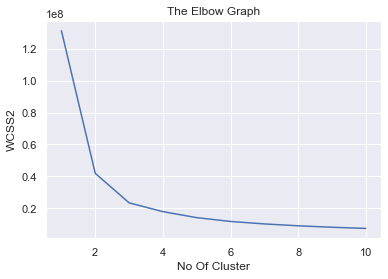

In [19]:
sns.set()
plt.plot(range(1,11), wcss2) 
plt.title('The Elbow Graph')
plt.xlabel('No Of Cluster')
plt.ylabel('WCSS2')
plt.show()

In [20]:
kmeans2 = KMeans(n_clusters = 3, init='k-means++')
y2 = kmeans2.fit_predict(interested_columns) 
print(y2)
y2.shape

[2 2 2 ... 2 2 2]


(158683,)

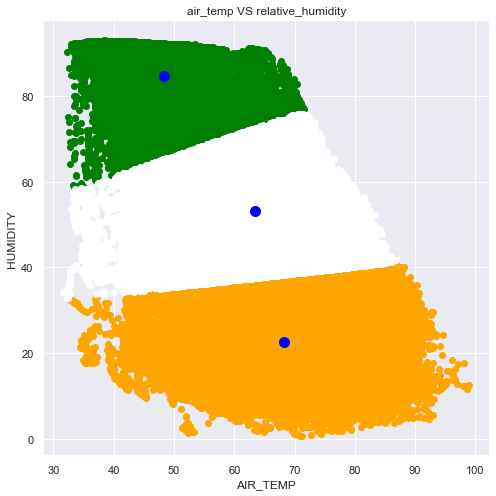

In [21]:
plt.figure(figsize=(8,8)) 
plt.scatter(interested_columns[y2==0,0], interested_columns[y2==0,1], c='green', label = 'humidity_category-A')
plt.scatter(interested_columns[y2==1,0], interested_columns[y2==1,1], c='orange', label = 'humidity_category-B')
plt.scatter(interested_columns[y2==2,0], interested_columns[y2==2,1], c='white', label = 'humidity_category-C')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroid')
plt.title('air_temp VS relative_humidity')
plt.xlabel('AIR_TEMP')
plt.ylabel('HUMIDITY')
plt.show()